# Impact of Policy Changes

## Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import kendalltau
import geopandas as gpd
import folium
import seaborn as sns
from scipy import stats
import sys
import os

# Update paths to get source code from notebook_utils
curr_dir = os.path.dirname(os.path.abspath('notebooks'))
proj_dir = os.path.dirname(curr_dir)
src_path = os.path.join(proj_dir, 'src')
sys.path.append(src_path)

from notebook_utils.preprocessing import *
from notebook_utils.policy_changes import *

# Create combined dataframe from ghcn_cleaned files
CA_stations_df = combine_files_to_dfs('../data/processed/ghcn_cleaned')

# Create combined dataframe from heat_events files
heat_events_df = combine_files_to_dfs('../data/processed/heat_events')

Processed file: CA_2003_clean.csv
Processed file: CA_2004_clean.csv
Processed file: CA_2005_clean.csv
Processed file: CA_2006_clean.csv
Processed file: CA_2007_clean.csv
Processed file: CA_2008_clean.csv
Processed file: CA_2009_clean.csv
Processed file: CA_2010_clean.csv
Processed file: CA_2011_clean.csv
Processed file: CA_2012_clean.csv
Processed file: CA_2013_clean.csv
Processed file: CA_2014_clean.csv
Processed file: CA_2015_clean.csv
Processed file: CA_2016_clean.csv
Processed file: CA_2017_clean.csv
Processed file: CA_2018_clean.csv
Processed file: CA_2019_clean.csv
Processed file: CA_2020_clean.csv
Processed file: CA_2021_clean.csv
Processed file: CA_2022_clean.csv
Processed file: CA_2023_clean.csv
Processed file: 2003_heat_events.csv
Processed file: 2004_heat_events.csv
Processed file: 2005_heat_events.csv
Processed file: 2006_heat_events.csv
Processed file: 2007_heat_events.csv
Processed file: 2008_heat_events.csv
Processed file: 2009_heat_events.csv
Processed file: 2010_heat_e

# Policy Review

### Policies and their implementation dates:
**1. California Climate Crisis Act - Implemented in September 2022**
* Goal: reach a net-zero greenhouse gas emissions by 2045
* Method: 
    - Shifting to electric transportation through electric bikes and cars
* Impact: This policy could have an impact on temperature trends in regions with high-traffic emissions where use of electric vehicles scould reduced local heating.

**3. Sustainable Communities and Climate Protection Act - Implemented in January 2009**
* Goal: reduce GHG emissions via regional transportation planning and sustainable community growth
* Method: 
    - Align land use, housing, and transportation planning to reduce emissions from vehicle traveling.
* Impact: This act was focused on urban locations and could impact temperature trends in relation to urban heat events.

# Prepare data

## Dataframe Time periods

- pre_CCCA: Dataframe for the time before the California CLimate Crisis Act.
- post_CCCA: Dataframe for the time after the California Climate Crisis Act.

- pre_SCCPA: Dataframe for the time beore the Sustainable Communities and Climate Protection Act.
- post_SCCPA: Dataframe for the time after the Sustainable Communities and Climate Protection Act.

### Filter Data for time periods

In [2]:
pre_CCCA = heat_events_df[heat_events_df['Year'] < 2022]
post_CCCA = heat_events_df[heat_events_df['Year'] >= 2022]

pre_SCCPA = heat_events_df[heat_events_df['Year'] < 2009]
post_SCCPA = heat_events_df[heat_events_df['Year'] >= 2009]

# Temporal Analysis of Temperature Trends and Heat Event Occurrences

### Temperature Trends

c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\src\notebook_utils\policy_changes.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['Year'] = df_period['datetime'].dt.year


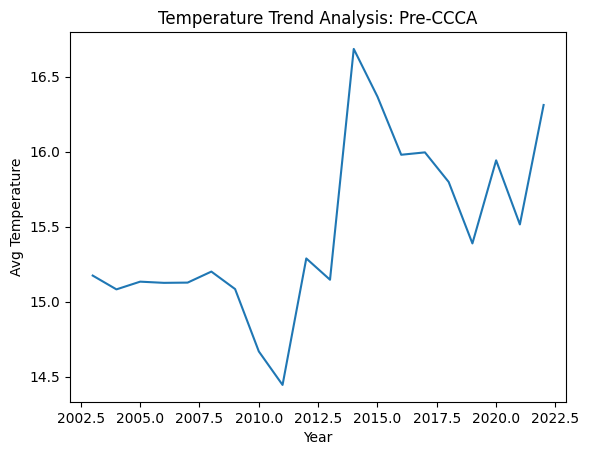

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.73
Date:                Fri, 13 Sep 2024   Prob (F-statistic):            0.00420
Time:                        21:08:13   Log-Likelihood:                -12.463
No. Observations:                  20   AIC:                             28.93
Df Residuals:                      18   BIC:                             30.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -106.1381     37.119     -2.859      0.0

c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\src\notebook_utils\policy_changes.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['Year'] = df_period['datetime'].dt.year


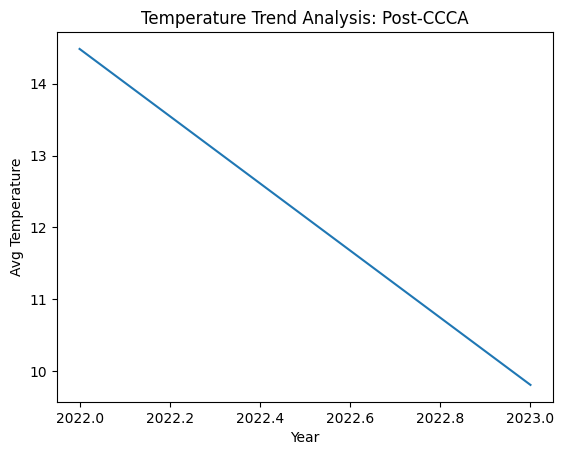

c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                nan
Time:                        21:08:14   Log-Likelihood:                 51.677
No. Observations:                   2   AIC:                            -99.35
Df Residuals:                       0   BIC:                            -102.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9467.8963        inf          0        n

c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\src\notebook_utils\policy_changes.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['Year'] = df_period['datetime'].dt.year


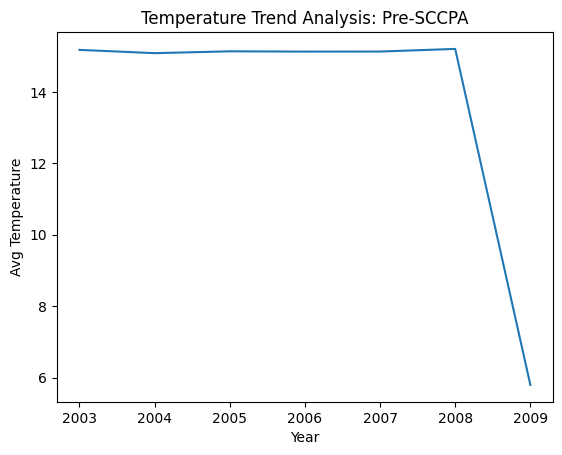

c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     2.955
Date:                Fri, 13 Sep 2024   Prob (F-statistic):              0.146
Time:                        21:08:16   Log-Likelihood:                -16.603
No. Observations:                   7   AIC:                             37.21
Df Residuals:                       5   BIC:                             37.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2013.4111   1163.170      1.731      0.1

c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\src\notebook_utils\policy_changes.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['Year'] = df_period['datetime'].dt.year


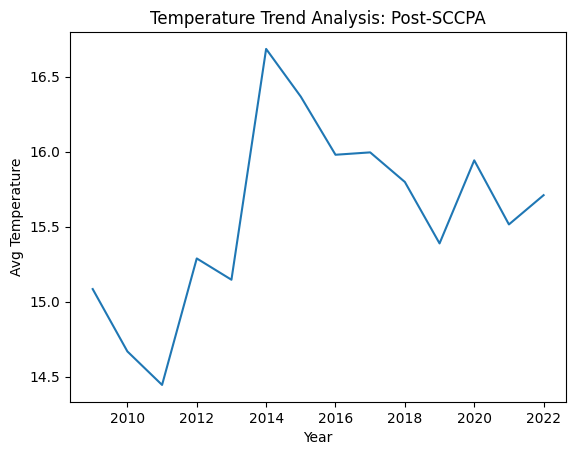

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     3.564
Date:                Fri, 13 Sep 2024   Prob (F-statistic):             0.0834
Time:                        21:08:19   Log-Likelihood:                -10.899
No. Observations:                  14   AIC:                             25.80
Df Residuals:                      12   BIC:                             27.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -128.0455     76.072     -1.683      0.1

c:\Users\lizbe\Documents\GitHub\PHIT-Project-1\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [3]:
# Perform trend analysis for pre-CCCA and post-CCCA
trend_analysis(CA_stations_df, '2003-01-01', '2022-09-01', 'Pre-CCCA')
trend_analysis(CA_stations_df, '2022-09-01', '2023-01-01', 'Post-CCCA') 

# Perform trend analysis for pre-SCCPA and post-SCCPA
trend_analysis(CA_stations_df, '2003-01-01', '2009-01-01', 'Pre-SCCPA')
trend_analysis(CA_stations_df, '2009-01-01', '2022-12-31', 'Post-SCCPA')

### Heat Event Occurences

In [4]:
heat_events_df['Start_date'] = pd.to_datetime(heat_events_df['Start_date'])
heat_events_df['End_date'] = pd.to_datetime(heat_events_df['End_date'])

In [5]:
pre_CCCA_metrics = calc_metrics(pre_CCCA)
post_CCCA_metrics = calc_metrics(post_CCCA)
pre_SCCPA_metrics = calc_metrics(pre_SCCPA)
post_SCCPA_metrics = calc_metrics(post_SCCPA)

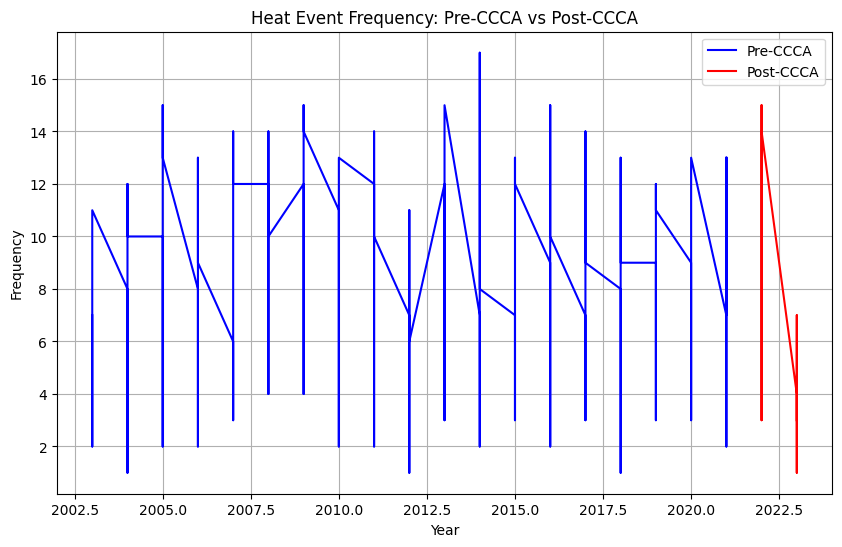

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(pre_CCCA_metrics['Year'], pre_CCCA_metrics['Frequency'], label='Pre-CCCA', color='blue')
plt.plot(post_CCCA_metrics['Year'], post_CCCA_metrics['Frequency'], label='Post-CCCA', color='red') 

plt.title('Heat Event Frequency: Pre-CCCA vs Post-CCCA')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

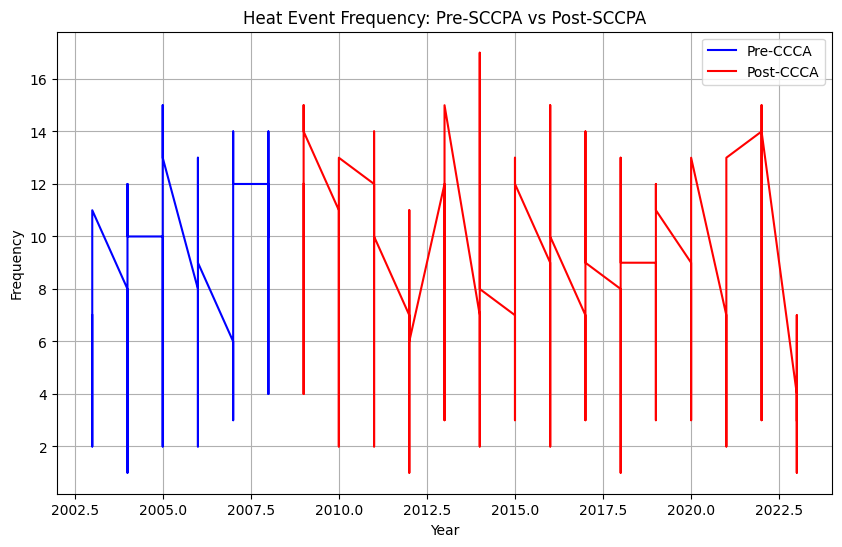

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(pre_SCCPA_metrics['Year'], pre_SCCPA_metrics['Frequency'], label='Pre-CCCA', color='blue')
plt.plot(post_SCCPA_metrics['Year'], post_SCCPA_metrics['Frequency'], label='Post-CCCA', color='red') 

plt.title('Heat Event Frequency: Pre-SCCPA vs Post-SCCPA')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# Spatiotemporal Analysis

# Summary of Findings